In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [7]:
df=pd.read_csv('ps.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


<AxesSubplot:>

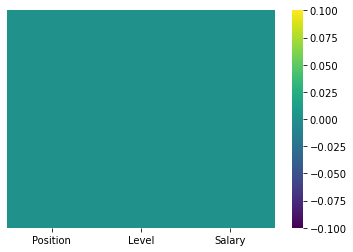

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [9]:
X=df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [10]:
Y=df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


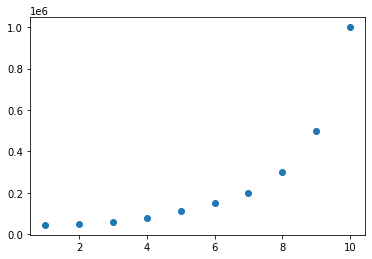

In [11]:
plt.scatter(X,Y)

## Linear Regression

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
LR=LinearRegression()

In [14]:
LR.fit(X_train, Y_train)

LinearRegression()

In [15]:
y_pred=LR.predict(X_test)

In [16]:
score=r2_score(Y_test,y_pred)
score

0.8451346684575975

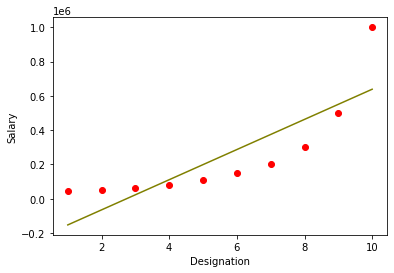

In [17]:
plt.scatter(X,Y,c='red')
plt.plot(X,LR.predict(X),c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [18]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
level=float(input())
LR.predict([[level]])

5


array([[199181.03448276]])

# Polynomial Regression

In [20]:
Degree=2

In [21]:
df=pd.read_csv('ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

In [22]:
PF=PolynomialFeatures(degree=2)
X=PF.fit_transform(X)

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
PR2=LinearRegression()
PR2.fit(X_train,Y_train)
y_pred=PR2.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.7666492889299907

In [25]:
df=pd.read_csv('ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

## degree =5

In [26]:
PF=PolynomialFeatures(degree=5)
X=PF.fit_transform(X)

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
PR5=LinearRegression()
PR5.fit(X_train,Y_train)
y_pred=PR5.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.9950481764355964

In [29]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [30]:
level=float(input())
PR5.predict(PF.fit_transform([[level]]))

5


array([[110882.13726579]])

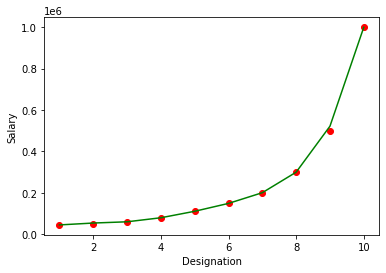

In [38]:
X=df.iloc[:,1:2]
plt.scatter(X,Y,c='red')
plt.plot(X,PR5.predict(PF.fit_transform(X)),c='green')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()